In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import gkey

%matplotlib notebook

In [2]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
#build payload
#set parameters
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-09 2018-09-09', geo='US-CA',gprop='')

In [4]:
#pytrends.interest_by_region(resolution = 'CITY')

In [5]:
tesla_searches = pytrends.interest_over_time()

tesla_searches.head()

,Tesla,isPartial
date,,
2017-09-10,45,False
2017-09-17,44,False
2017-09-24,45,False
2017-10-01,46,False
2017-10-08,46,False


In [42]:
tesla_array = tesla_searches["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

53

In [6]:
tesla_df = tesla_searches.drop(columns= "isPartial")

tesla_df.head()

,Tesla
date,
2017-09-10,45
2017-09-17,44
2017-09-24,45
2017-10-01,46
2017-10-08,46


Text(0,0.5,'% of Searches')

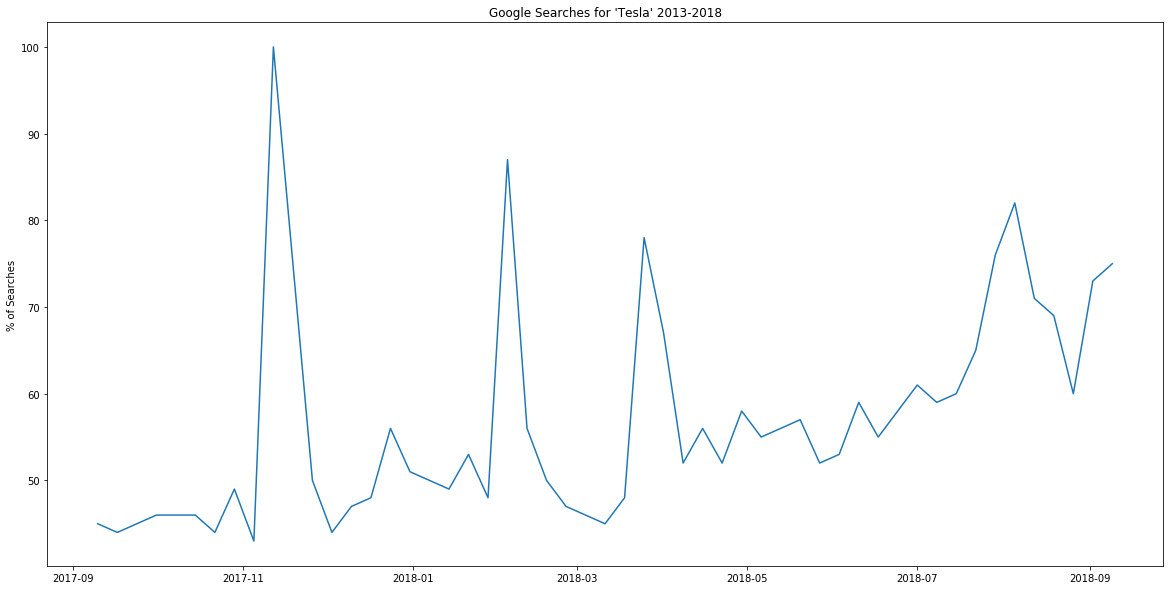

In [7]:
plt.figure(figsize=(20,10))
plt.plot(tesla_df)
plt.title("Google Searches for 'Tesla' 2013-2018")
plt.ylabel("% of Searches")

In [8]:
#pull the same data for 'Prius'

In [9]:
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-09 2018-09-09', geo='US-CA',gprop='')

In [10]:
prius_searches = pytrends.interest_over_time()

prius_searches.head()

,Prius,isPartial
date,,
2017-09-10,86,False
2017-09-17,80,False
2017-09-24,84,False
2017-10-01,78,False
2017-10-08,73,False


In [45]:
#append Prius Google search popularity to a list
prius_array = prius_searches["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

53

In [11]:
prius_df = prius_searches.drop(columns= "isPartial")

prius_df.head()

,Prius
date,
2017-09-10,86
2017-09-17,80
2017-09-24,84
2017-10-01,78
2017-10-08,73


Text(0,0.5,'% of Searches')

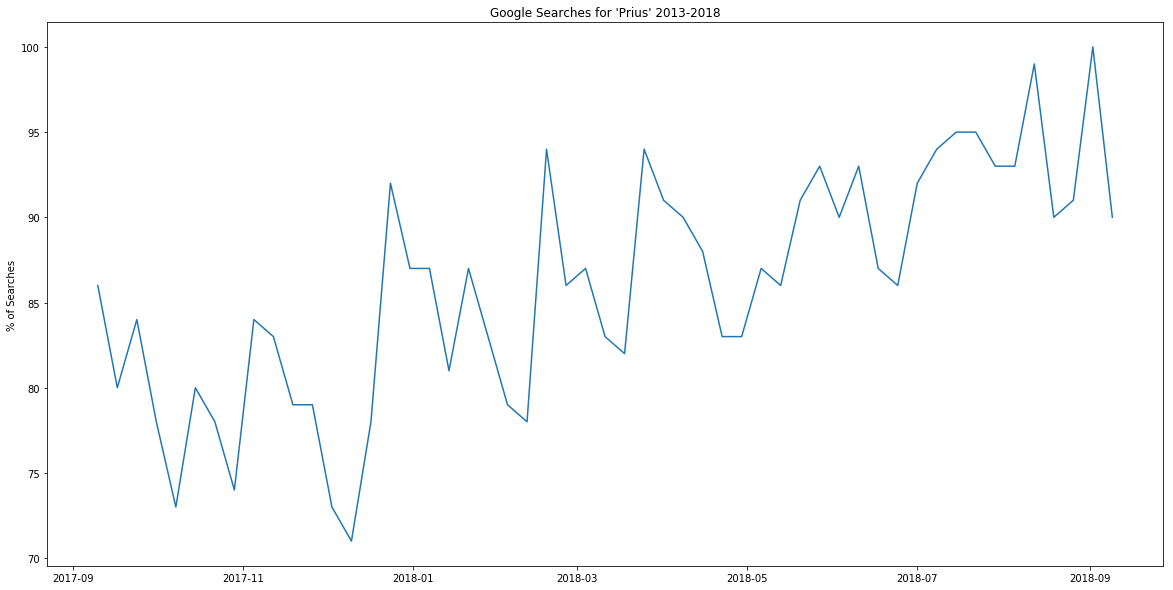

In [12]:
plt.figure(figsize=(20,10))
plt.plot(prius_df)
plt.title("Google Searches for 'Prius' 2013-2018")
plt.ylabel("% of Searches")

In [13]:
#pull the same data for 'Electric car'

In [14]:
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-09 2018-09-09', geo='US-CA',gprop='')

In [15]:
ecar_searches = pytrends.interest_over_time()

ecar_searches.head()

,Electric car,isPartial
date,,
2017-09-10,54,False
2017-09-17,60,False
2017-09-24,59,False
2017-10-01,53,False
2017-10-08,50,False


In [44]:
ecar_array = ecar_searches["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

53

In [16]:
ecar_df = ecar_searches.drop(columns= "isPartial")

ecar_df.head()

,Electric car
date,
2017-09-10,54
2017-09-17,60
2017-09-24,59
2017-10-01,53
2017-10-08,50


Text(0,0.5,'% of Searches')

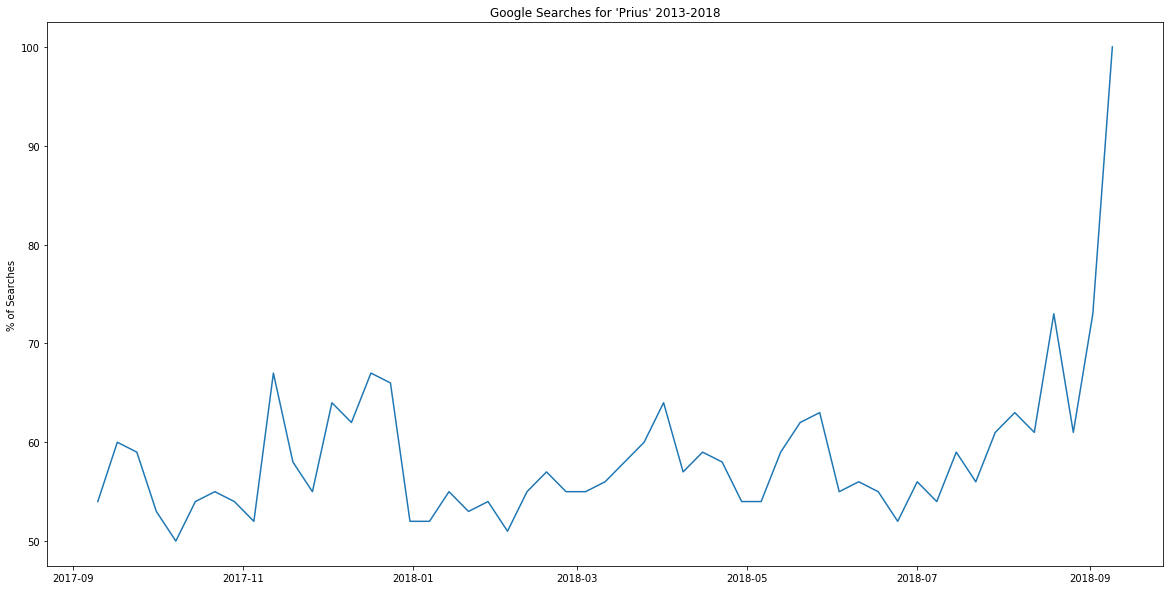

In [17]:
plt.figure(figsize=(20,10))
plt.plot(ecar_df)
plt.title("Google Searches for 'Prius' 2013-2018")
plt.ylabel("% of Searches")

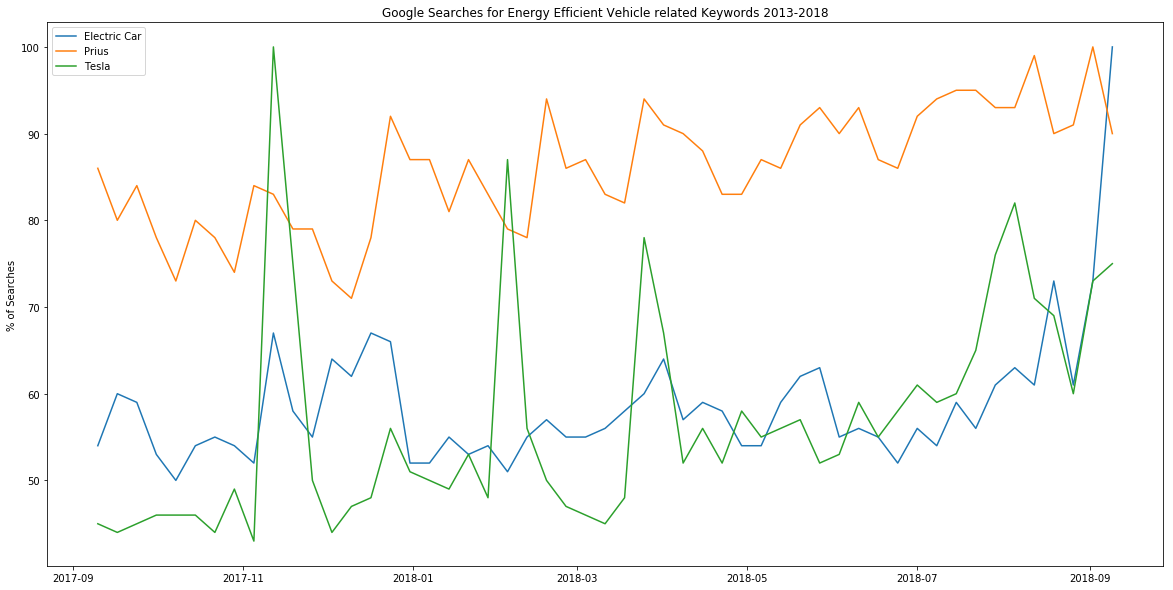

In [18]:
plt.figure(figsize=(20,10))
ecar, = plt.plot(ecar_df)
prius, = plt.plot(prius_df)
tesla, = plt.plot(tesla_df)
plt.title("Google Searches for Energy Efficient Vehicle related Keywords 2013-2018")
plt.ylabel("% of Searches")
plt.legend((ecar, prius, tesla),("Electric Car","Prius","Tesla"))

In [40]:
#import gas prices data
ca_weekly = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")
ca_weekly = ca_weekly.set_index("Date")
ca_weekly = ca_weekly.dropna()

#locate data for 2018
ca_weekly_2018 = ca_weekly.loc["2017-09-04":"2018-09-03",:]
ca_weekly_2018.head()

,Price
Date,
2017-09-04,3.221
2017-09-11,3.242
2017-09-18,3.219
2017-09-25,3.199
2017-10-02,3.166


In [41]:
#save the gas price values into a list
gas_array = ca_weekly_2018["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

53

In [51]:
#build a dataframe with the lists 
comparison_df = ca_weekly_2018.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)
#multiply gas price by 10 
comparison_df['Price'] = comparison_df['Price']*10
comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-09-04,32.21,45,54,86
2017-09-11,32.42,44,60,80
2017-09-18,32.19,45,59,84
2017-09-25,31.99,46,53,78
2017-10-02,31.66,46,50,73


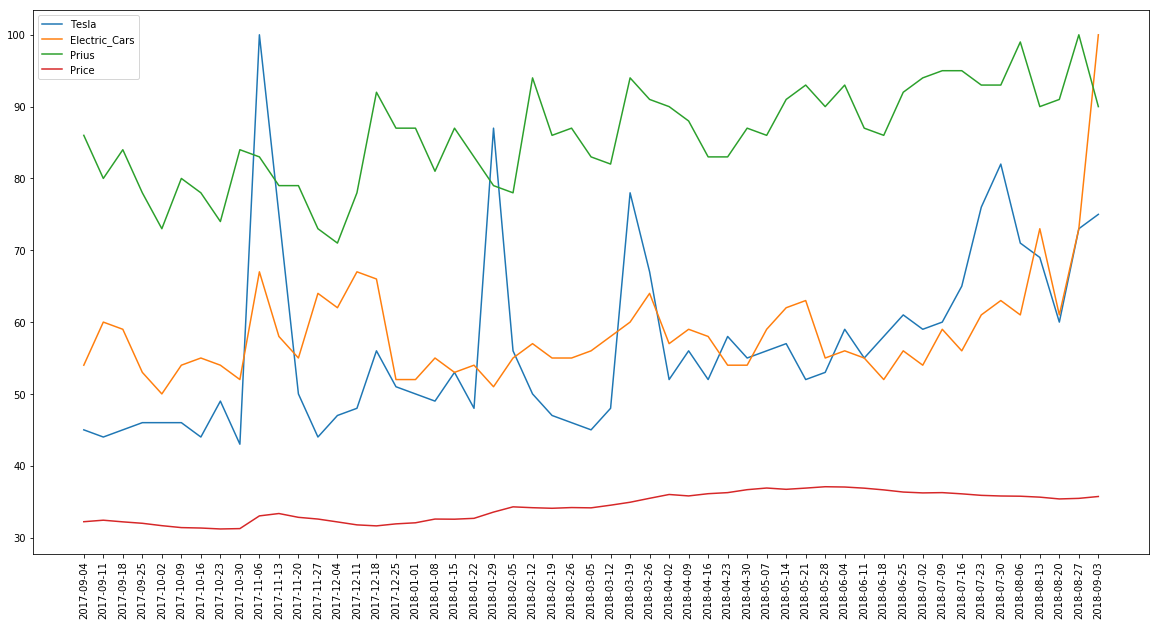

In [55]:
plt.figure(figsize=(20,10))
#plot each line individually for better legends
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.legend()
plt.xticks(rotation=90)
plt.savefig("Images/trends_gasprice_comparison_pastyear.png")

In [48]:
#dict_ = {"Tesla": tesla_df["Tesla"],
        #"Electric Car": ecar_df["Electric car"],
        #"Prius": prius_df["Prius"],
        #"Gas Price": ca_weekly_2018["Price"]}

#combined_df = pd.DataFrame(dict_,index=None)
#combined_df.head()
#dict_["Gas Price"]